# Assignment: Income Prediction of Individuals Using XGBoost

## Overview:

In this assignment I have used XGBoost to predict income of an individaul. This data was extracted from the census bureau database found at http://www.census.gov/ftp/pub/DES/www/welcome.html donated by  Ronny Kohavi and Barry Becker, Data Mining and Visualization (Email: ronnyk@sgi.com)

Dataset Link: 
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/



## Preprocess Datasets:

In this step I have first all the loaded datasets given in adult.data.csv which is used for training purpose. I also loaded adult.test.csv which is used for training/validation purpose.



In [1]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score

E:\anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
E:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1500)

In [3]:
# load adult.data.csv into application_train_data dataframe
#application_train_data = pd.read_csv('adult.data.csv', header=None)

application_train_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
print('Training data shape:',application_train_data.shape)

Training data shape: (32561, 15)


In [4]:
application_train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
column_list = ['AGE', 'WORKCLASS', 'FNLWGT', 'EDUCATION', 'EDUCATION_NUM', 'MARITAL_STATUS','OCCUPATION','RELATIONSHIP','RACE','SEX','CAPITAL_GAIN','CAPITAL_LOSS','HOURS_PER_WEEK','NATIVE_COUNTRY','TARGET']
application_train_data.columns = column_list
application_train_data['TARGET'] = application_train_data['TARGET'].apply(lambda x: 1 if x.strip() =='>50K' else 0)

In [6]:
application_train_data.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION_NUM,MARITAL_STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL_GAIN,CAPITAL_LOSS,HOURS_PER_WEEK,NATIVE_COUNTRY,TARGET
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [7]:
# load adult.test.csv into application_test_data dataframe
#application_test_data = pd.read_csv('adult.test.csv', header=None)
application_test_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)
print('Test data shape:',application_test_data.shape)

Test data shape: (16281, 15)


In [8]:
application_test_data.columns = column_list
application_test_data['TARGET'] = application_test_data['TARGET'].apply(lambda x: 1 if x.strip() =='>50K' else 0)

In [9]:
application_test_data.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION_NUM,MARITAL_STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL_GAIN,CAPITAL_LOSS,HOURS_PER_WEEK,NATIVE_COUNTRY,TARGET
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,0
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


## Missing Data Analysis

In this step, we first get which all columns have missing values and then calculate percentage of records which have missing values in each column.



In [10]:
application_train_data.isnull().any()

AGE               False
WORKCLASS         False
FNLWGT            False
EDUCATION         False
EDUCATION_NUM     False
MARITAL_STATUS    False
OCCUPATION        False
RELATIONSHIP      False
RACE              False
SEX               False
CAPITAL_GAIN      False
CAPITAL_LOSS      False
HOURS_PER_WEEK    False
NATIVE_COUNTRY    False
TARGET            False
dtype: bool

In [11]:
application_test_data.isnull().any()

AGE               False
WORKCLASS         False
FNLWGT            False
EDUCATION         False
EDUCATION_NUM     False
MARITAL_STATUS    False
OCCUPATION        False
RELATIONSHIP      False
RACE              False
SEX               False
CAPITAL_GAIN      False
CAPITAL_LOSS      False
HOURS_PER_WEEK    False
NATIVE_COUNTRY    False
TARGET            False
dtype: bool

## Interpretation
As there are no missing value columns, we can skip this

## Analyze the data

## Get statistical parameters of the training and test data

In [12]:
application_train_data.describe()

,AGE,FNLWGT,EDUCATION_NUM,CAPITAL_GAIN,CAPITAL_LOSS,HOURS_PER_WEEK,TARGET
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [13]:
application_test_data.describe()

,AGE,FNLWGT,EDUCATION_NUM,CAPITAL_GAIN,CAPITAL_LOSS,HOURS_PER_WEEK,TARGET
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000,16281.0
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236,0.0
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332,0.0
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.0
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000,0.0
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000,0.0
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000,0.0
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000,0.0


## Interpretation: 
From the statistics parameters, mean of fnlwght is very high value 1.894357e+05, so we need log transformation


## Get the event rate

Event rate percentage is calculated by dividing number of 1 in INCOME field by total number of records multiplied by 100

In [14]:
event_rate = (sum(application_train_data.loc[application_train_data['TARGET']==1,'TARGET'] )/application_train_data.shape[0])*100
print("Event_Rate: " + str(event_rate) + "%")

Event_Rate: 24.080955744602438%


## Interpretation:
From the Event Rate, it is clear that target income is imbalanced, hence we need to consider recall, precision in addition to accuracy

## Analyze WORKCLASS vs TARGET

* Create count of each type of WORKCLASS
* Create a cross-tabulation bar plot between WORKCLASS vs TARGET

In [15]:
application_train_data['WORKCLASS'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: WORKCLASS, dtype: int64

                      No   Yes    Percent
WORKCLASS                                
 ?                  1645   191  10.403050
 Federal-gov         589   371  38.645833
 Local-gov          1476   617  29.479216
 Never-worked          7     0   0.000000
 Private           17733  4963  21.867289
 Self-emp-inc        494   622  55.734767
 Self-emp-not-inc   1817   724  28.492719
 State-gov           945   353  27.195686
 Without-pay          14     0   0.000000


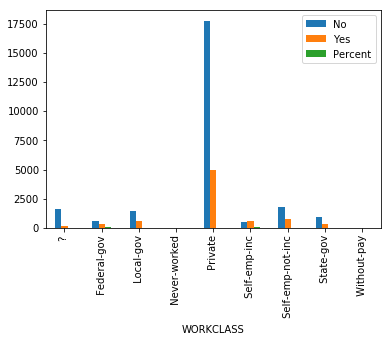

In [16]:
tab = pd.crosstab(index=application_train_data['WORKCLASS'],columns=application_train_data['TARGET'])
tab.columns = ['No','Yes']
tab['Percent'] = tab.Yes/(tab.No+tab.Yes) * 100
print(tab)
tab.plot(kind='bar')

## Interpretation:
In terms of absolute numbers Private workclass have most number of people (4963) having > 50K income. However, percentage wise 21 percent of total private employees have mre tahn 50K income

% of Yes of Private employed 21.86% dividing by event rate, lift value = 21.86/24.08 = 0.91

% of Yes Self-emp-inc  is 55.73 divinding by event rate, lift value = 55.73/24.08 = 2.31

% of Yes of Federal-gov is 38.65, dividing by event rate, lift value = 38.65/24.08 = 1.60

% of Yes of Local-gov  is 29.48 dividing by event rate, lift value =29.48/24.08= 1.22

From the lift values, workcalss could be significant



## Analyze EDUCATION vs TARGET

Create count of each type of EDUCATION
Create a cross-tabulation bar plot between WORKCLASS vs TARGET

                 No   Yes    Percent
EDUCATION                           
 10th           871    62   6.645230
 11th          1115    60   5.106383
 12th           400    33   7.621247
 1st-4th        162     6   3.571429
 5th-6th        317    16   4.804805
 7th-8th        606    40   6.191950
 9th            487    27   5.252918
 Assoc-acdm     802   265  24.835989
 Assoc-voc     1021   361  26.121563
 Bachelors     3134  2221  41.475257
 Doctorate      107   306  74.092010
 HS-grad       8826  1675  15.950862
 Masters        764   959  55.658735
 Preschool       51     0   0.000000
 Prof-school    153   423  73.437500
 Some-college  5904  1387  19.023454


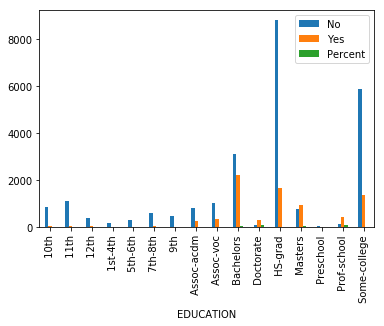

In [17]:
tab = pd.crosstab(index=application_train_data['EDUCATION'],columns=application_train_data['TARGET'])
tab.columns = ['No','Yes']
tab['Percent'] = tab.Yes/(tab.No+tab.Yes) * 100
print(tab)
tab.plot(kind='bar')

## Interpretation

In terms of absoulute numbers bachelors degree have highest number of persons having > 50K income. In terms of percentage, doctorates have
highest percentage of people having > 50K

% of Yes of Doctorate 74.09 dividing by event rate, lift value = 74.09/24.08 = 3.07

% of Yes Masters  is 55.65 divinding by event rate, lift value = 55.65/24.08 = 2.31

% of Yes of Bachelors is 41.48, dividing by event rate, lift value = 41.48/24.08 = 1.72

% of Yes of HS-grad  is 15.95 dividing by event rate, lift value = 15.95/24.08= 0.66

From the lift values, education could be significant



## Analyze MARITAL_STATUS vs TARGET

Create count of each type of  MARITAL_STATUS Create a cross-tabulation bar plot between MARITAL_STATUS vs TARGET

                           No   Yes    Percent
MARITAL_STATUS                                
 Divorced                3980   463  10.420887
 Married-AF-spouse         13    10  43.478261
 Married-civ-spouse      8284  6692  44.684829
 Married-spouse-absent    384    34   8.133971
 Never-married          10192   491   4.596087
 Separated                959    66   6.439024
 Widowed                  908    85   8.559919


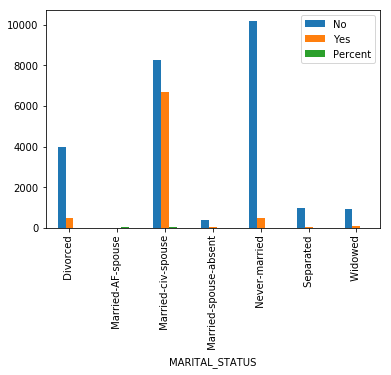

In [18]:
tab = pd.crosstab(index=application_train_data['MARITAL_STATUS'],columns=application_train_data['TARGET'])
tab.columns = ['No','Yes']
tab['Percent'] = tab.Yes/(tab.No+tab.Yes) * 100
print(tab)
tab.plot(kind='bar')

Interpretation:

% of Yes of Married-civ-spouse 44.68 dividing by event rate, lift value = 44.68/24.08 = 1.86
% of Yes of Never-married 4.60 dividing by event rate, lift value = 4.60/24.08 = 0.19
% of Yes of Divorced 10.42 dividing by event rate, lift value = 10.42/24.08 = 0.43

From the lift values MARITAL_STATUS is a significant feature in determining person having income > 50K


## Linear correlation analysis of fields:


TARGET, CAPITAL_GAIN, CAPITAL_LOSS, HOURS_PER_WEEK

* First calculate correlation coefficinets
* Draw the heatmap



Correlation coefficients are:
                  TARGET  CAPITAL_GAIN  CAPITAL_LOSS  HOURS_PER_WEEK
TARGET          1.000000      0.223329      0.150526        0.229689
CAPITAL_GAIN    0.223329      1.000000     -0.031615        0.078409
CAPITAL_LOSS    0.150526     -0.031615      1.000000        0.054256
HOURS_PER_WEEK  0.229689      0.078409      0.054256        1.000000


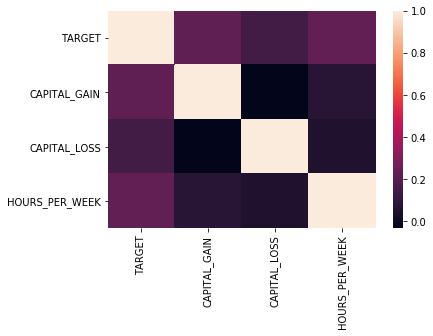

In [19]:
cor = application_train_data[['TARGET','CAPITAL_GAIN','CAPITAL_LOSS','HOURS_PER_WEEK']].corr()
print( "Correlation coefficients are:")
print(str(cor))

sns.heatmap(cor)

## Interpretation: 

As all the correlation coefficients are low value, the fields TARGET, CAPITAL_GAIN, CAPITAL_LOSS, HOURS_PER_WEEK do not have
correlation

## Linear correlation analysis of fields:


TARGET, AGE, FNLWGT, EDUCATION_NUM

* First calculate correlation coefficinets
* Draw the heatmap


Correlation coefficients are:
                 TARGET       AGE    FNLWGT  EDUCATION_NUM
TARGET         1.000000  0.234037 -0.009463       0.335154
AGE            0.234037  1.000000 -0.076646       0.036527
FNLWGT        -0.009463 -0.076646  1.000000      -0.043195
EDUCATION_NUM  0.335154  0.036527 -0.043195       1.000000


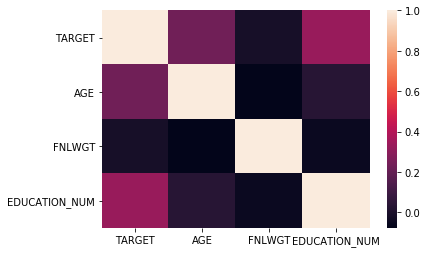

In [20]:
cor = application_train_data[['TARGET','AGE','FNLWGT','EDUCATION_NUM']].corr()
print( "Correlation coefficients are:")
print(str(cor))

sns.heatmap(cor)

## Interpretation: 
From the heatmap it is clear that EDUCATION_NUM there is some corrrelation to TARGET

## Field Transformations

i. Logarithmic Transformation: For highly-skewed feature distributions such as FNLWGT, CAPITAL_GAIN  CAPITAL_LOSS, logarithmic transformation is done on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of 0 is undefined, so we must translate the values by a small amount above 0 to apply the the logarithm successfully.

ii. Normalizing Numerical Features

In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as  EDUCATION_NUM, AGE above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

iii.One hot encoding for categorical features Categorical variables having more than two possible vlaues are encoded using the one-hot encoding scheme. One-hot encoding creates a "dummy" variable for each possible category of each non-numeric feature. For example, assume someFeature has three possible entries: A, B, or C. We then encode this feature into someFeature_A, someFeature_B and someFeature_C.

iv. Label Encoding: Categorical variables having more than two possible are encoded using Label Encode to have values 0 and 1

In [21]:
# Perform log transformation
log_transform_fields = [ 'FNLWGT', 'CAPITAL_GAIN', 'CAPITAL_LOSS']

train_data = pd.DataFrame(data = application_train_data)
train_data[log_transform_fields] = application_train_data[log_transform_fields].apply(lambda x: np.log(x + 1))

test_data = pd.DataFrame(data = application_test_data)
test_data[log_transform_fields] = application_test_data[log_transform_fields].apply(lambda x: np.log(x + 1))

In [22]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

numerical = ['AGE','FNLWGT','EDUCATION_NUM', 'CAPITAL_GAIN', 'CAPITAL_LOSS']

temp1 = pd.DataFrame(data = train_data)
temp1[numerical] = scaler.fit_transform( train_data[numerical])
train_data = temp1

temp2 = pd.DataFrame(data = test_data)
temp2[numerical] = scaler.fit_transform( test_data[numerical])
test_data = temp2

In [23]:
train_data.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION_NUM,MARITAL_STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL_GAIN,CAPITAL_LOSS,HOURS_PER_WEEK,NATIVE_COUNTRY,TARGET
0,0.301370,State-gov,0.384197,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,40,United-States,0
1,0.452055,Self-emp-not-inc,0.399234,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,13,United-States,0
2,0.287671,Private,0.597596,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40,United-States,0
3,0.493151,Private,0.615275,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,40,United-States,0
4,0.150685,Private,0.691582,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,40,Cuba,0


## Interpretation:

The accuracy score of original model is higher than reduced model. So I will stick with original model

In [24]:
#  One-hot encode the 'train_data' data using pandas.get_dummies()
categorical = ['WORKCLASS','EDUCATION','MARITAL_STATUS','OCCUPATION','RELATIONSHIP','RACE','SEX', 'NATIVE_COUNTRY']

train_data = pd.get_dummies(data = train_data, columns = categorical)

test_data = pd.get_dummies(data = test_data, columns = categorical)

In [25]:
# Drop the fields TARGET to create dataframe train_data_x
train_data_x = train_data.drop(['TARGET'], axis=1)

# Get only filed TARGET to create dataframe train_data_y
train_data_y = train_data['TARGET']

In [26]:
train_data_x.head()

,AGE,FNLWGT,EDUCATION_NUM,CAPITAL_GAIN,CAPITAL_LOSS,HOURS_PER_WEEK,WORKCLASS_ ?,WORKCLASS_ Federal-gov,WORKCLASS_ Local-gov,WORKCLASS_ Never-worked,WORKCLASS_ Private,WORKCLASS_ Self-emp-inc,WORKCLASS_ Self-emp-not-inc,WORKCLASS_ State-gov,WORKCLASS_ Without-pay,EDUCATION_ 10th,EDUCATION_ 11th,EDUCATION_ 12th,EDUCATION_ 1st-4th,EDUCATION_ 5th-6th,EDUCATION_ 7th-8th,EDUCATION_ 9th,EDUCATION_ Assoc-acdm,EDUCATION_ Assoc-voc,EDUCATION_ Bachelors,EDUCATION_ Doctorate,EDUCATION_ HS-grad,EDUCATION_ Masters,EDUCATION_ Preschool,EDUCATION_ Prof-school,EDUCATION_ Some-college,MARITAL_STATUS_ Divorced,MARITAL_STATUS_ Married-AF-spouse,MARITAL_STATUS_ Married-civ-spouse,MARITAL_STATUS_ Married-spouse-absent,MARITAL_STATUS_ Never-married,MARITAL_STATUS_ Separated,MARITAL_STATUS_ Widowed,OCCUPATION_ ?,OCCUPATION_ Adm-clerical,OCCUPATION_ Armed-Forces,OCCUPATION_ Craft-repair,OCCUPATION_ Exec-managerial,OCCUPATION_ Farming-fishing,OCCUPATION_ Handlers-cleaners,OCCUPATION_ Machine-op-inspct,OCCUPATION_ Other-service,OCCUPATION_ Priv-house-serv,OCCUPATION_ Prof-specialty,OCCUPATION_ Protective-serv,OCCUPATION_ Sales,OCCUPATION_ Tech-support,OCCUPATION_ Transport-moving,RELATIONSHIP_ Husband,RELATIONSHIP_ Not-in-family,RELATIONSHIP_ Other-relative,RELATIONSHIP_ Own-child,RELATIONSHIP_ Unmarried,RELATIONSHIP_ Wife,RACE_ Amer-Indian-Eskimo,RACE_ Asian-Pac-Islander,RACE_ Black,RACE_ Other,RACE_ White,SEX_ Female,SEX_ Male,NATIVE_COUNTRY_ ?,NATIVE_COUNTRY_ Cambodia,NATIVE_COUNTRY_ Canada,NATIVE_COUNTRY_ China,NATIVE_COUNTRY_ Columbia,NATIVE_COUNTRY_ Cuba,NATIVE_COUNTRY_ Dominican-Republic,NATIVE_COUNTRY_ Ecuador,NATIVE_COUNTRY_ El-Salvador,NATIVE_COUNTRY_ England,NATIVE_COUNTRY_ France,NATIVE_COUNTRY_ Germany,NATIVE_COUNTRY_ Greece,NATIVE_COUNTRY_ Guatemala,NATIVE_COUNTRY_ Haiti,NATIVE_COUNTRY_ Holand-Netherlands,NATIVE_COUNTRY_ Honduras,NATIVE_COUNTRY_ Hong,NATIVE_COUNTRY_ Hungary,NATIVE_COUNTRY_ India,NATIVE_COUNTRY_ Iran,NATIVE_COUNTRY_ Ireland,NATIVE_COUNTRY_ Italy,NATIVE_COUNTRY_ Jamaica,NATIVE_COUNTRY_ Japan,NATIVE_COUNTRY_ Laos,NATIVE_COUNTRY_ Mexico,NATIVE_COUNTRY_ Nicaragua,NATIVE_COUNTRY_ Outlying-US(Guam-USVI-etc),NATIVE_COUNTRY_ Peru,NATIVE_COUNTRY_ Philippines,NATIVE_COUNTRY_ Poland,NATIVE_COUNTRY_ Portugal,NATIVE_COUNTRY_ Puerto-Rico,NATIVE_COUNTRY_ Scotland,NATIVE_COUNTRY_ South,NATIVE_COUNTRY_ Taiwan,NATIVE_COUNTRY_ Thailand,NATIVE_COUNTRY_ Trinadad&Tobago,NATIVE_COUNTRY_ United-States,NATIVE_COUNTRY_ Vietnam,NATIVE_COUNTRY_ Yugoslavia
0,0.301370,0.384197,0.800000,0.667492,0.0,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.399234,0.800000,0.000000,0.0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.597596,0.533333,0.000000,0.0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.615275,0.400000,0.000000,0.0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.691582,0.800000,0.000000,0.0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
train_data_y.head()

0    0
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [28]:
# Drop the fields TARGET to create dataframe test_data_x
test_data_x = test_data.drop(['TARGET'], axis=1)

# Get only filed TARGET to create dataframe test_data_y
test_data_y = test_data['TARGET']

In [29]:
test_data_x.head()

,AGE,FNLWGT,EDUCATION_NUM,CAPITAL_GAIN,CAPITAL_LOSS,HOURS_PER_WEEK,WORKCLASS_ ?,WORKCLASS_ Federal-gov,WORKCLASS_ Local-gov,WORKCLASS_ Never-worked,WORKCLASS_ Private,WORKCLASS_ Self-emp-inc,WORKCLASS_ Self-emp-not-inc,WORKCLASS_ State-gov,WORKCLASS_ Without-pay,EDUCATION_ 10th,EDUCATION_ 11th,EDUCATION_ 12th,EDUCATION_ 1st-4th,EDUCATION_ 5th-6th,EDUCATION_ 7th-8th,EDUCATION_ 9th,EDUCATION_ Assoc-acdm,EDUCATION_ Assoc-voc,EDUCATION_ Bachelors,EDUCATION_ Doctorate,EDUCATION_ HS-grad,EDUCATION_ Masters,EDUCATION_ Preschool,EDUCATION_ Prof-school,EDUCATION_ Some-college,MARITAL_STATUS_ Divorced,MARITAL_STATUS_ Married-AF-spouse,MARITAL_STATUS_ Married-civ-spouse,MARITAL_STATUS_ Married-spouse-absent,MARITAL_STATUS_ Never-married,MARITAL_STATUS_ Separated,MARITAL_STATUS_ Widowed,OCCUPATION_ ?,OCCUPATION_ Adm-clerical,OCCUPATION_ Armed-Forces,OCCUPATION_ Craft-repair,OCCUPATION_ Exec-managerial,OCCUPATION_ Farming-fishing,OCCUPATION_ Handlers-cleaners,OCCUPATION_ Machine-op-inspct,OCCUPATION_ Other-service,OCCUPATION_ Priv-house-serv,OCCUPATION_ Prof-specialty,OCCUPATION_ Protective-serv,OCCUPATION_ Sales,OCCUPATION_ Tech-support,OCCUPATION_ Transport-moving,RELATIONSHIP_ Husband,RELATIONSHIP_ Not-in-family,RELATIONSHIP_ Other-relative,RELATIONSHIP_ Own-child,RELATIONSHIP_ Unmarried,RELATIONSHIP_ Wife,RACE_ Amer-Indian-Eskimo,RACE_ Asian-Pac-Islander,RACE_ Black,RACE_ Other,RACE_ White,SEX_ Female,SEX_ Male,NATIVE_COUNTRY_ ?,NATIVE_COUNTRY_ Cambodia,NATIVE_COUNTRY_ Canada,NATIVE_COUNTRY_ China,NATIVE_COUNTRY_ Columbia,NATIVE_COUNTRY_ Cuba,NATIVE_COUNTRY_ Dominican-Republic,NATIVE_COUNTRY_ Ecuador,NATIVE_COUNTRY_ El-Salvador,NATIVE_COUNTRY_ England,NATIVE_COUNTRY_ France,NATIVE_COUNTRY_ Germany,NATIVE_COUNTRY_ Greece,NATIVE_COUNTRY_ Guatemala,NATIVE_COUNTRY_ Haiti,NATIVE_COUNTRY_ Honduras,NATIVE_COUNTRY_ Hong,NATIVE_COUNTRY_ Hungary,NATIVE_COUNTRY_ India,NATIVE_COUNTRY_ Iran,NATIVE_COUNTRY_ Ireland,NATIVE_COUNTRY_ Italy,NATIVE_COUNTRY_ Jamaica,NATIVE_COUNTRY_ Japan,NATIVE_COUNTRY_ Laos,NATIVE_COUNTRY_ Mexico,NATIVE_COUNTRY_ Nicaragua,NATIVE_COUNTRY_ Outlying-US(Guam-USVI-etc),NATIVE_COUNTRY_ Peru,NATIVE_COUNTRY_ Philippines,NATIVE_COUNTRY_ Poland,NATIVE_COUNTRY_ Portugal,NATIVE_COUNTRY_ Puerto-Rico,NATIVE_COUNTRY_ Scotland,NATIVE_COUNTRY_ South,NATIVE_COUNTRY_ Taiwan,NATIVE_COUNTRY_ Thailand,NATIVE_COUNTRY_ Trinadad&Tobago,NATIVE_COUNTRY_ United-States,NATIVE_COUNTRY_ Vietnam,NATIVE_COUNTRY_ Yugoslavia
0,0.109589,0.599816,0.400000,0.000000,0.0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.287671,0.402918,0.533333,0.000000,0.0,50,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.150685,0.683958,0.733333,0.000000,0.0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0.369863,0.526083,0.600000,0.777174,0.0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.013699,0.433059,0.600000,0.000000,0.0,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [30]:
test_data_y.head()

0    0
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [31]:
# Check if there is any field which is there in train_data_x but not in test_data_x and vice versa
train_col_set = set(train_data_x.columns.values.tolist())
test_col_set = set(test_data_x.columns.values.tolist())

train_minus_test_list = list(train_col_set - test_col_set)
test_minus_train_list = list(test_col_set - train_col_set)

In [32]:
train_minus_test_list

['NATIVE_COUNTRY_ Holand-Netherlands']

In [33]:
test_minus_train_list

[]

In [34]:
train_data_x = train_data_x.drop(['NATIVE_COUNTRY_ Holand-Netherlands'], axis=1)

## Train using XGBClassifier and calulate accuracy score on  test data

In [35]:
from xgboost import XGBClassifier

                 
model = XGBClassifier(random_state=0)
model.fit(train_data_x, train_data_y)
test_predict = model.predict(test_data_x)
acc_score = accuracy_score(test_predict, test_data_y)
print("Accuracy Score: " + str(acc_score))


Accuracy Score: 0.8255021190344574


E:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Conclusion:

By using XGBClassifier I got a accuracy of 82.55 on test data